<a href="https://colab.research.google.com/github/Sushobhan55/Sentiment-Analysis-/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install flair

In [ ]:
from datetime import datetime
import requests
import pandas as pd
import seaborn as sns

In [ ]:
BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAALxdMQEAAAAAQLauISsmwNTTuOUiyjIY9Snq0JE%3DAM4UuquXRQvENnoZ6MCtSuAZws71IOWzApcPa1kWYInJwsQEJP'

In [ ]:
params = {'q': 'tesla',
            'tweet_mode': 'extended','lang': 'en',
            'count': '500'}
response=requests.get('https://api.twitter.com/1.1/search/tweets.json',params=params,
                        headers={'authorization': 'Bearer '+BEARER_TOKEN})

In [ ]:
print(response.json())

{'statuses': [{'created_at': 'Tue Sep 14 14:29:49 +0000 2021', 'id': 1437785661327691785, 'id_str': '1437785661327691785', 'full_text': '@bg98021 @TroyDavis74 @jpr007 1/\nLooks "fishy", I agree.\nHowever, don\'t say "software wouldn\'t make that mistake"!\nI just happen to finish a paid job where I had to automate scraping contents from #Tesla super charger PDF invoices into a CSV table. Don\'t ask me how horrible these software generated PDFs were.', 'truncated': False, 'display_text_range': [30, 310], 'entities': {'hashtags': [{'text': 'Tesla', 'indices': [197, 203]}], 'symbols': [], 'user_mentions': [{'screen_name': 'bg98021', 'name': 'BG98021', 'id': 1097744305207345152, 'id_str': '1097744305207345152', 'indices': [0, 8]}, {'screen_name': 'TroyDavis74', 'name': 'Troy Davis', 'id': 3167089055, 'id_str': '3167089055', 'indices': [9, 21]}, {'screen_name': 'jpr007', 'name': 'JPR007', 'id': 52370117, 'id_str': '52370117', 'indices': [22, 29]}], 'urls': []}, 'metadata': {'iso_language_co

In [ ]:
def get_data(tweet):
  data = {
      'id': tweet['id_str'],
      'created_at': tweet['created_at'],
      'text': tweet['full_text']
  }
  return data

In [ ]:
df = pd.DataFrame()
for tweet in response.json()['statuses']:
  row = get_data(tweet)
  df = df.append(row, ignore_index=True)

In [ ]:
tweets = df['text']
txts = tweets.to_list()

In [ ]:
import flair
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

In [ ]:
values = []
confidence = []
for txt in txts:
  sentence = flair.data.Sentence(txt)
  sentiment_model.predict(sentence)
  v = sentence.labels[0].to_dict()['value']
  c = sentence.labels[0].to_dict()['confidence']
  values.append(v)
  confidence.append(c)

In [ ]:
df['values'] = values
df['confidence'] = confidence

In [ ]:
df

,created_at,id,text,values,confidence
0,Tue Sep 14 14:29:49 +0000 2021,1437785661327691785,"@bg98021 @TroyDavis74 @jpr007 1/\nLooks ""fishy...",NEGATIVE,0.999997
1,Tue Sep 14 14:29:48 +0000 2021,1437785660685967362,RT @CryptoRickClub: 🔥 TESLA GIVEAWAY 🔥\n\nOur ...,POSITIVE,0.949608
2,Tue Sep 14 14:29:45 +0000 2021,1437785644307206149,RT @MUSKSWAPCHANNEL: 🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥\n\nDO YOU WA...,NEGATIVE,0.985754
3,Tue Sep 14 14:29:43 +0000 2021,1437785639777353735,Seemingly no one thinks about their windshield...,NEGATIVE,0.998191
4,Tue Sep 14 14:29:43 +0000 2021,1437785639588671493,RT @KiwiEV: Random dude in a combustion car ha...,NEGATIVE,0.992987
...,...,...,...,...,...
95,Tue Sep 14 14:26:53 +0000 2021,1437784923583176715,RT @ElectrekCo: Tesla cofounder JB Straubel an...,POSITIVE,0.897269
96,Tue Sep 14 14:26:52 +0000 2021,1437784922542985219,@wanda_hudson @Tesla The TAM for @Tesla is eno...,POSITIVE,0.748292
97,Tue Sep 14 14:26:52 +0000 2021,1437784920034795527,@alex_avoigt Tesla has big problems with deliv...,NEGATIVE,0.977089
98,Tue Sep 14 14:26:50 +0000 2021,1437784914179547137,RT @Ebag72: @elonmusk Hello Mr Musk. Being tha...,POSITIVE,0.810857


In [ ]:
df.groupby(by='values').agg('count')

,created_at,id,text,confidence
values,,,,
NEGATIVE,42,42,42,42
POSITIVE,58,58,58,58


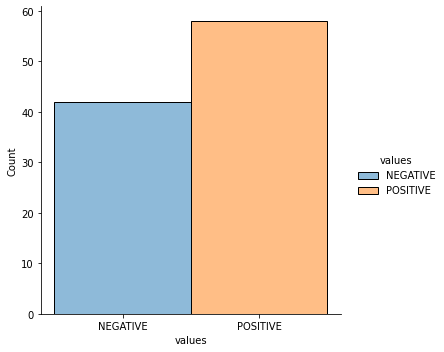

In [ ]:
sns.displot(df,x='values', hue='values' )